In [2]:
import numpy as np
import sys
import dimod
import matplotlib.pyplot as plt

from dwave.system import EmbeddingComposite, DWaveSampler
from pythia_generator import generator
from qubo_generator import make_qubo
from embedding_generator import generate_embedding

In [15]:
num_ev = 1000
n_part = []
n_qubits = []
chain_length = []

for i in range(num_ev):
    # Generate a Pythia event
    particles = generator()
    nq = 0;

    # Use particles in event to generate qubo
    #qubo, offset = make_qubo(particles, np.pi/2.)

    embedding = generate_embedding(len(particles))

    # Get distribution of chain lengths
    for sub_embed in embedding:
        nq += sub_embed

    n_part.append(len(particles))
    n_qubits.append(nq)
    

Embedding on 1431 spin variables
Embedding on 465 spin variables
Embedding on 1953 spin variables
Embedding on 1431 spin variables
Embedding on 406 spin variables
Embedding on 3486 spin variables
Embedding on 1653 spin variables
Embedding on 1653 spin variables
Embedding on 1378 spin variables
Embedding on 780 spin variables
Embedding on 741 spin variables
Embedding on 351 spin variables
Embedding on 325 spin variables
Embedding on 2278 spin variables
Embedding on 276 spin variables
Embedding on 703 spin variables
Embedding on 1596 spin variables
Embedding on 666 spin variables
Embedding on 378 spin variables
Embedding on 820 spin variables
Embedding on 595 spin variables
Embedding on 703 spin variables
Embedding on 1035 spin variables
Embedding on 820 spin variables
Embedding on 741 spin variables
Embedding on 231 spin variables
Embedding on 1953 spin variables
Embedding on 2080 spin variables
Embedding on 496 spin variables
Embedding on 861 spin variables
Embedding on 153 spin variab

RuntimeError: can't start new thread

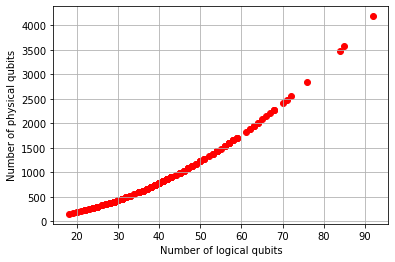

In [17]:
fig, ax = plt.subplots()

ax.grid()
ax.scatter(n_part, n_qubits, color='red')
ax.set_xlabel('Number of logical qubits')
ax.set_ylabel('Number of physical qubits')

plt.savefig('plots/nqubits.png')
plt.show()

In [ ]:
# Get distribution of chain lengths
chain_length = []
for i in range(len(embedding)):
    chain_length.append(len(embedding[i]))

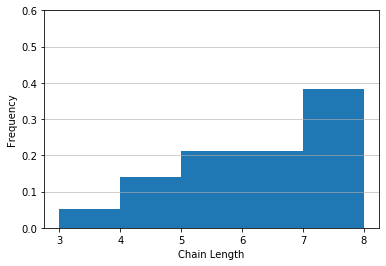

In [4]:
# Plot results
counts, bins = np.histogram(chain_length, range(3,10), density=True)
plt.hist(bins[:-1], bins, weights=counts)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Chain Length')
plt.ylabel('Frequency')
plt.ylim(0,0.6)
plt.savefig('images/chainlength_dist.png')

In [ ]:
x_val = []
y_val = []
z_val = []

n_part = len(particles)

for i in range(0,n_part):
    key_x = 's[%s]' %i
    for j in range(0,n_part):
        key_y = 's[%s]' %j
        try:
            value = qubo[key_x, key_y]
            x_val.append(i)
            y_val.append(j)
            z_val.append(value)
        except KeyError:
            #print(key_x, key_y)
            continue
            

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

plt.scatter(x_val, y_val, c = z_val)
plt.xlabel('Spin Variable')
plt.ylabel('Spin Variable')

cbar = plt.colorbar()
cbar.set_label("Coupling Strength", labelpad=+1)

plt.savefig('images/coupling_strength_pi2.png')
plt.show()

In [ ]:
np.max(z_val)

In [ ]:
z_val